In [1]:
import numpy as np
import matplotlib.pyplot as plt

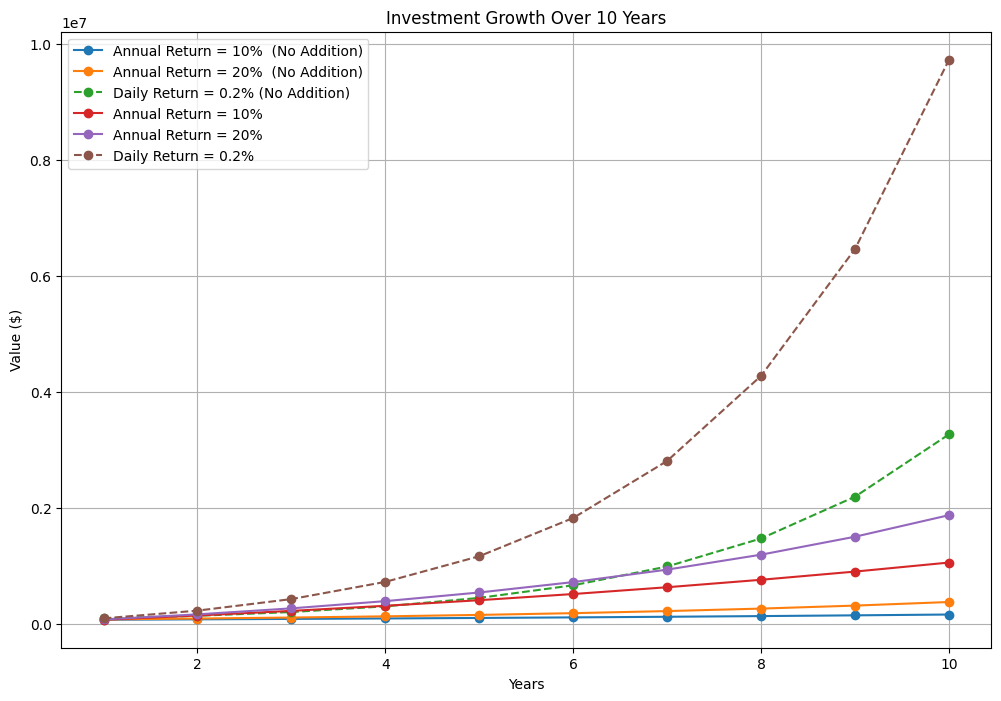

In [2]:
# Initial variables
initial_principal = 60000
annual_addition = 60000  # additional amount added to the principal each year
years = 10  # investment period in years
daily_return = 0.002
trading_days = 200

# Initialize variables for plotting
years_range = np.arange(1, years + 1)
future_values = {
    "annual_10_no_addition": np.zeros(years),
    "annual_20_no_addition": np.zeros(years),
    "daily_no_addition": np.zeros(years),
    "annual_10": np.zeros(years),
    "annual_20": np.zeros(years),
    "daily": np.zeros(years),
}

# Without annual additions
principal = initial_principal
for i in range(years):
    principal *= 1.10  # Changing annual return to 10%
    future_values["annual_10_no_addition"][i] = principal

principal = initial_principal
for i in range(years):
    principal *= 1.2
    future_values["annual_20_no_addition"][i] = principal

principal = initial_principal
for year in range(years):
    for _ in range(trading_days):
        principal *= (1 + daily_return)
    future_values["daily_no_addition"][year] = principal

# With annual additions
principal = initial_principal
for i in range(years):
    principal *= 1.10  # Changing annual return to 10%
    future_values["annual_10"][i] = principal
    principal += annual_addition

principal = initial_principal
for i in range(years):
    principal *= 1.2
    future_values["annual_20"][i] = principal
    principal += annual_addition

principal = initial_principal
for year in range(years):
    for _ in range(trading_days):
        principal *= (1 + daily_return)
    future_values["daily"][year] = principal
    if year < years - 1:  # Ensure addition is not made after the last year
        principal += annual_addition

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(years_range, future_values["annual_10_no_addition"], label='Annual Return = 10%  (No Addition)', marker='o')
plt.plot(years_range, future_values["annual_20_no_addition"], label='Annual Return = 20%  (No Addition)', marker='o')
plt.plot(years_range, future_values["daily_no_addition"], label='Daily Return = 0.2% (No Addition)', marker='o', linestyle='--')
plt.plot(years_range, future_values["annual_10"], label='Annual Return = 10%', marker='o')
plt.plot(years_range, future_values["annual_20"], label='Annual Return = 20%', marker='o')
plt.plot(years_range, future_values["daily"], label='Daily Return = 0.2%', marker='o', linestyle='--')

plt.title('Investment Growth Over 10 Years')
plt.xlabel('Years')
plt.ylabel('Value ($)')
plt.legend()
plt.grid(True)

plt.show()

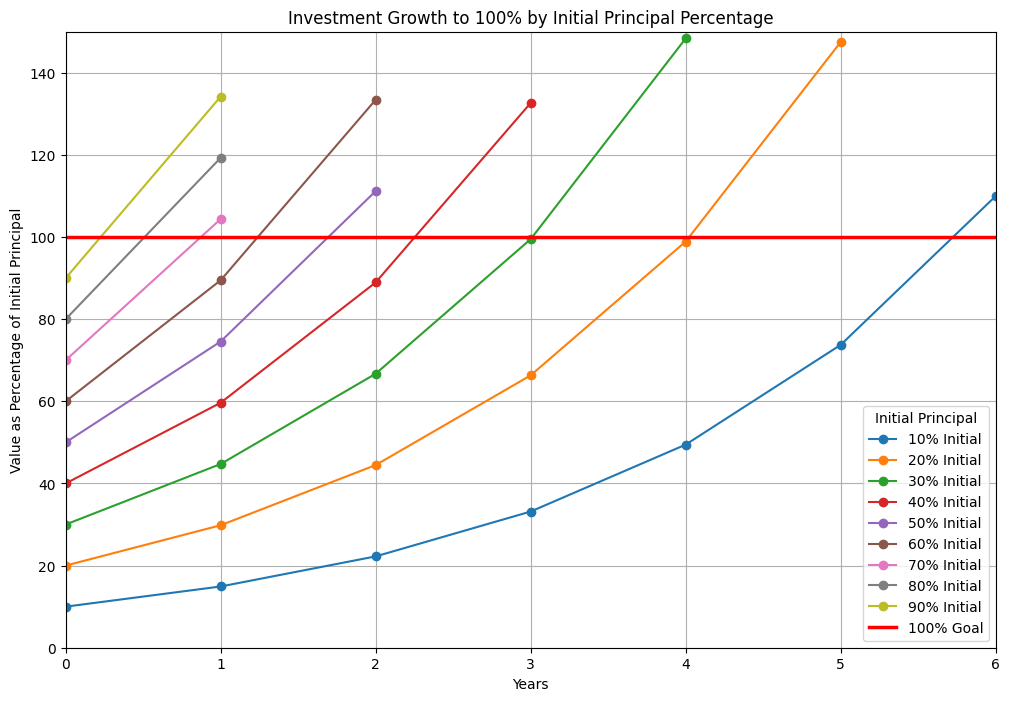

In [3]:
# Parameters for the new plot
initial_principal_percentages = np.arange(0.1, 1.0, 0.1)  # From 10% to 90%
trading_days_per_year = 200
daily_return_rate = 0.002
years_to_plot = np.arange(0, 7)
growth_values = {percentage: [percentage * 100] for percentage in initial_principal_percentages}

# Calculate growth over time
for percentage in initial_principal_percentages:
    principal = percentage
    for year in years_to_plot[1:]:
        for _ in range(trading_days_per_year):
            principal *= 1 + daily_return_rate
        growth_values[percentage].append(principal * 100)  # Convert to percentage
        if principal >= 1.0:  # Check if principal has exceeded 100%
            break  # Stop calculating further for this percentage once 100% is reached


# Plotting
plt.figure(figsize=(12, 8))
for percentage, values in growth_values.items():
    plt.plot(years_to_plot[:len(values)], values, marker='o', label=f'{percentage*100:.0f}% Initial')

plt.axhline(y=100, color='r', linestyle='-', linewidth=2.5, label='100% Goal')

plt.title('Investment Growth to 100% by Initial Principal Percentage')
plt.xlabel('Years')
plt.ylabel('Value as Percentage of Initial Principal')
plt.ylim(0, 150)  # Set y-axis from 0% to 150%
plt.xlim(0, max(years_to_plot))  # Ensure x-axis covers up to 20 years
plt.legend(title="Initial Principal", loc="lower right")
plt.grid(True)

plt.show()
